In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('magic04.txt')

In [3]:
df.columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.261,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.788,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.737,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.462,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19019 non-null  float64
 1   fWidth    19019 non-null  float64
 2   fSize     19019 non-null  float64
 3   fConc     19019 non-null  float64
 4   fConc1    19019 non-null  float64
 5   fAsym     19019 non-null  float64
 6   fM3Long   19019 non-null  float64
 7   fM3Trans  19019 non-null  float64
 8   fAlpha    19019 non-null  float64
 9   fDist     19019 non-null  float64
 10  class     19019 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


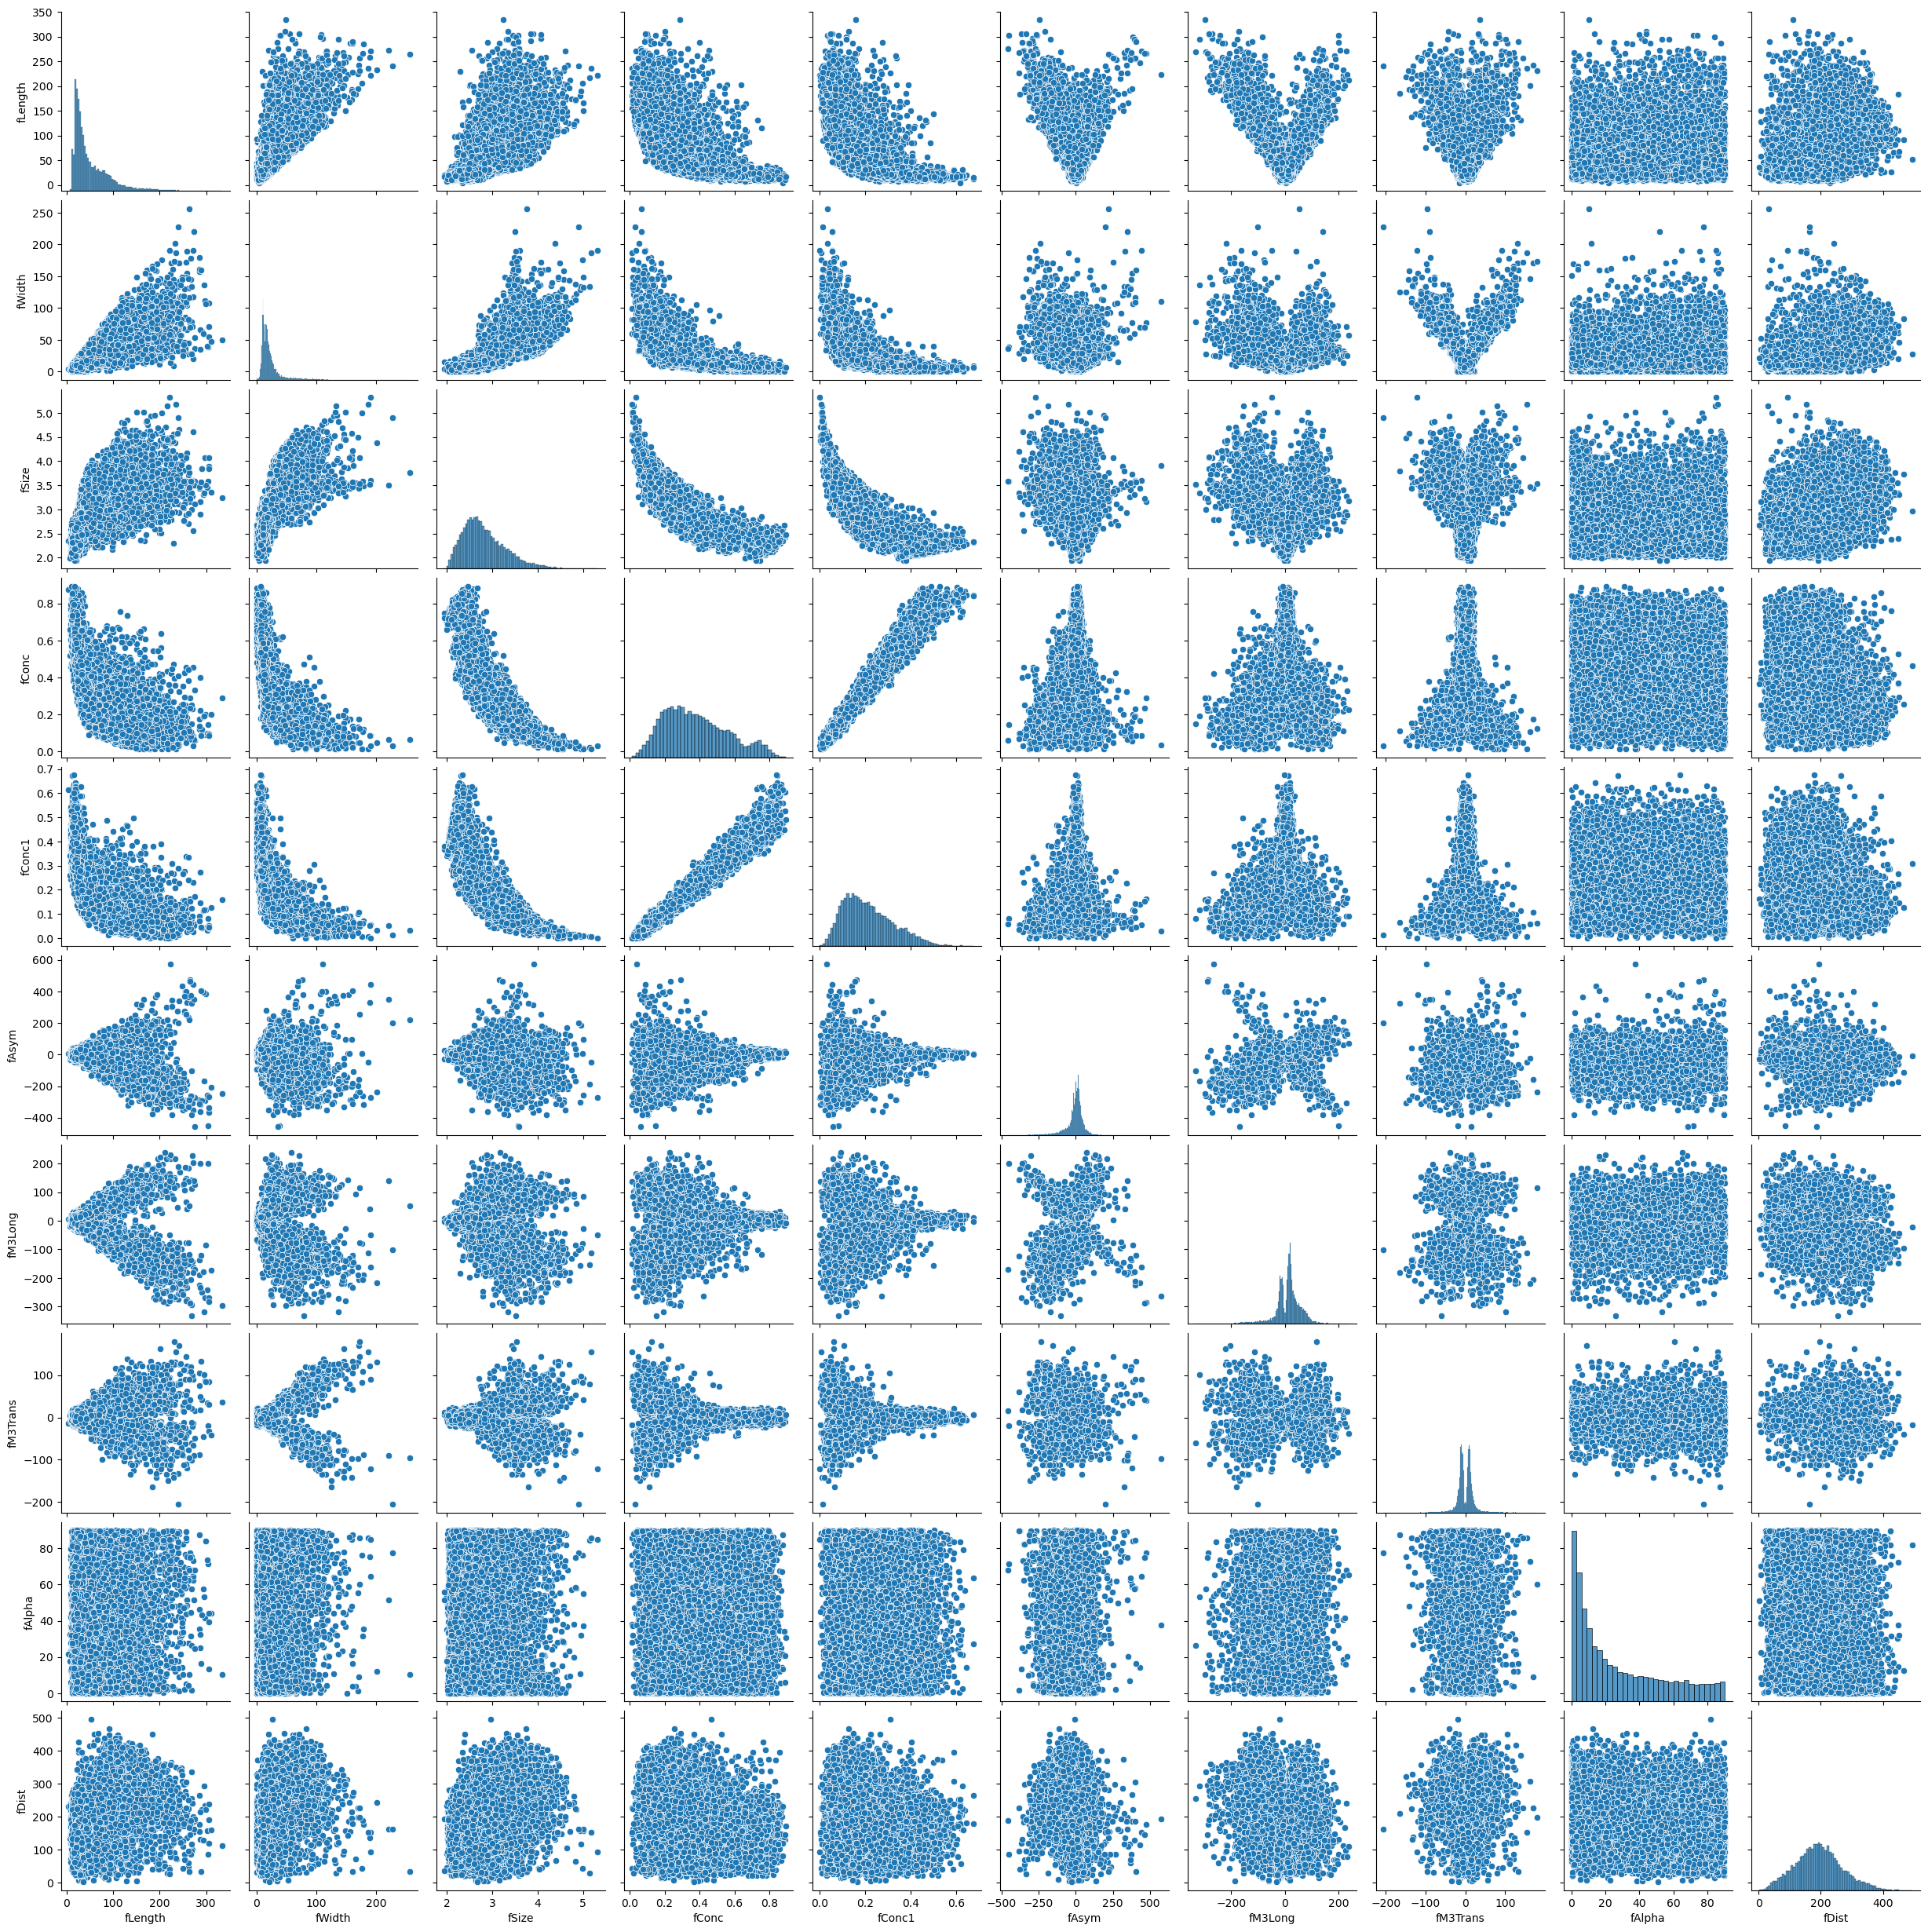

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x=df[['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']].values
# x is 2 dimension

In [9]:
y=df['class'].values
# y is 1 dimension

In [10]:
y

array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder #because y column has strings, must convert to int/float

In [12]:
le = LabelEncoder() #labelencoder helps to transform the string elems to float/ints

In [13]:
conv_class = le.fit_transform(y) #transform y column to float/int

In [14]:
df['class'] = conv_class #replace in original dataframe

In [15]:
df['class'] #check

0        0
1        0
2        0
3        0
4        0
        ..
19014    1
19015    1
19016    1
19017    1
19018    1
Name: class, Length: 19019, dtype: int32

In [16]:
y = df['class'].values #get the values

In [17]:
y #check

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
x_train,X_test,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=102)

In [19]:
x_train.shape

(13313, 10)

In [20]:
X_test.shape

(5706, 10)

In [21]:
# normalize and scale feature data
from sklearn.preprocessing import MinMaxScaler

In [22]:
help (MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

In [23]:
scaler=MinMaxScaler()

In [24]:
scaler.fit(x_train)

MinMaxScaler()

In [25]:
x_train=scaler.transform(x_train)
X_test=scaler.transform(X_test)

In [26]:
x_train.max()

1.0

In [27]:
x_train.min()

0.0

In [28]:
# let us create a model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
#help (Sequential)
#help (Dense)

In [31]:
#option-1
model=Sequential([Dense(4, activation='relu'),Dense(4, activation='relu'),Dense(1)])
# Dense()-> densely connected layer, feed forward network. 4 units means 4 neurons and activation function='relu'. you can try with 2 neurons or 1 neuron.

In [32]:
#option-2
model=Sequential()
model.add(Dense(4,activation='relu'))#1st layer
model.add(Dense(4,activation='relu'))#2nd layer
model.add(Dense(1)) #output

In [33]:
model.compile(optimizer='rmsprop',loss='mse')
#'mse'-> mean square error

In [34]:
model.fit(x=x_train,y=y_train,epochs=250)
#epochs -> number of pass over the entired dataset

Epoch 1/250
417/417 [==============================] - 0s 457us/step - loss: 0.2051
Epoch 2/250
417/417 [==============================] - 0s 449us/step - loss: 0.1613
Epoch 3/250
417/417 [==============================] - 0s 457us/step - loss: 0.1532
Epoch 4/250
417/417 [==============================] - 0s 454us/step - loss: 0.1488
Epoch 5/250
417/417 [==============================] - 0s 445us/step - loss: 0.1441
Epoch 6/250
417/417 [==============================] - 0s 447us/step - loss: 0.1403
Epoch 7/250
417/417 [==============================] - 0s 447us/step - loss: 0.1374
Epoch 8/250
417/417 [==============================] - 0s 450us/step - loss: 0.1352
Epoch 9/250
417/417 [==============================] - 0s 449us/step - loss: 0.1334
Epoch 10/250
417/417 [==============================] - 0s 449us/step - loss: 0.1320
Epoch 11/250
417/417 [==============================] - 0s 450us/step - loss: 0.1311
Epoch 12/250
417/417 [==============================] - 0s 452us/step - lo

417/417 [==============================] - 0s 452us/step - loss: 0.1148
Epoch 193/250
417/417 [==============================] - 0s 454us/step - loss: 0.1149
Epoch 194/250
417/417 [==============================] - 0s 476us/step - loss: 0.1148
Epoch 195/250
417/417 [==============================] - 0s 462us/step - loss: 0.1147
Epoch 196/250
417/417 [==============================] - 0s 459us/step - loss: 0.1146
Epoch 197/250
417/417 [==============================] - 0s 466us/step - loss: 0.1146
Epoch 198/250
417/417 [==============================] - 0s 464us/step - loss: 0.1148
Epoch 199/250
417/417 [==============================] - 0s 469us/step - loss: 0.1147
Epoch 200/250
417/417 [==============================] - 0s 462us/step - loss: 0.1146
Epoch 201/250
417/417 [==============================] - 0s 462us/step - loss: 0.1147
Epoch 202/250
417/417 [==============================] - 0s 467us/step - loss: 0.1144
Epoch 203/250
417/417 [==============================] - 0s 461us/st

In [35]:
model.history.history
#store as dataframe

{'loss': [0.2050921767950058,
  0.16129474341869354,
  0.15320943295955658,
  0.14880546927452087,
  0.14412571489810944,
  0.14026834070682526,
  0.13740921020507812,
  0.13518860936164856,
  0.13339988887310028,
  0.13201764225959778,
  0.13105833530426025,
  0.13033641874790192,
  0.12967316806316376,
  0.1293153017759323,
  0.12884213030338287,
  0.12826834619045258,
  0.12781406939029694,
  0.12746849656105042,
  0.1270376443862915,
  0.1265518069267273,
  0.12612397968769073,
  0.12590594589710236,
  0.12540531158447266,
  0.12508992850780487,
  0.12458714842796326,
  0.12434100359678268,
  0.12385739386081696,
  0.12375470250844955,
  0.1234765499830246,
  0.12323146313428879,
  0.12311811000108719,
  0.12271077930927277,
  0.12230473011732101,
  0.12212710082530975,
  0.1219274178147316,
  0.12170696258544922,
  0.12147840857505798,
  0.1211332157254219,
  0.12102097272872925,
  0.12079454958438873,
  0.12030351907014847,
  0.12029411643743515,
  0.12003237754106522,
  0.119749

In [36]:
loss_df=pd.DataFrame(model.history.history)

In [37]:
loss_df.plot()

<AxesSubplot:>

In [38]:
#Evaluation of dataset

In [39]:
model.evaluate(X_test,y_test,verbose=0)
#returns mean square error

0.11413618177175522

In [40]:
model.evaluate(x_train,y_train,verbose=0)

0.11303268373012543

In [41]:
test_predictions=model.predict(X_test)

179/179 [==============================] - 0s 381us/step


In [42]:
test_predictions = pd.Series(test_predictions.reshape(5706))
#converting to dataframe

In [43]:
pred_df=pd.DataFrame(y_test,columns=['Org Y'])

In [44]:
pred_df

,Org Y
0,0
1,0
2,1
3,0
4,0
...,...
5701,0
5702,0
5703,1
5704,0


In [45]:
pred_df=pd.concat([pred_df,test_predictions],axis=1)
pred_df.columns=['OrgY','Predictions']

In [46]:
pred_df

,OrgY,Predictions
0,0,0.160044
1,0,0.132704
2,1,0.668408
3,0,0.043765
4,0,0.216697
...,...,...
5701,0,0.491095
5702,0,0.687518
5703,1,0.960042
5704,0,0.141551


In [47]:
sns.scatterplot(x='OrgY',y='Predictions',data=pred_df)

<AxesSubplot:xlabel='OrgY', ylabel='Predictions'>

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
mean_absolute_error(pred_df['OrgY'],pred_df['Predictions'])

0.23289567604726275

In [50]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000,19019.000000
mean,53.251440,22.181291,2.825026,0.380326,0.214658,-4.333429,10.544942,0.250170,27.645052,193.823912,0.351648
std,42.365598,18.346484,0.472609,0.182818,0.110514,59.207163,51.001391,20.827896,26.104151,74.729344,0.477497
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863700,2.477100,0.235800,0.128450,-20.588300,-12.845050,-10.849750,5.546950,142.499000,0.000000
50%,37.149000,17.140600,2.739600,0.354100,0.196500,4.011900,15.309400,0.689800,17.677000,191.856900,0.000000
75%,70.126850,24.739950,3.101600,0.503700,0.285250,24.060350,35.844100,10.947050,45.884100,240.564550,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [51]:
#Save model

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save('telescope.h5')

In [54]:
#to load
my_model=load_model('telescope.h5')

In [9]:
import h5py

with h5py.File('telescope.h5', 'r') as hf:
    ls = list(hf.keys())
    #['model_weights', 'optimizer_weights']
    data = hf.get('optimizer_weights')
    dataset = np.array(data)
    print(dataset.shape)
'''
f = h5py.File('telescope.h5','r')
f.attrs.get('model_config')
'''

(1,)


"\nf = h5py.File('telescope.h5','r')\nf.attrs.get('model_config')\n"